In [ ]:
############### GET API KEYS
from twython import Twython
import json
import csv

credentials = {}
credentials["API_KEY"] = "AZVjw2iplhA5dNszUeGxjOgjv"
credentials["API_SECRET"] = "RZ8E6R59gC9oW92Qz4YFRgygACvD4onQRzqyUTPRzKfnnQSW3H"
credentials["ACCESS_TOKEN"] = "1501925600105218050-7xtRvXQGeA6wkft2kPoA5JOj0PnBmq"
credentials["ACCESS_TOKEN_SECRET"] = "0Fl3hzhnogVszJGEorAh9r7XBRspU7XQaWERfC8JXtA2M"


##### SAVE CREDENTIALS IN JSON FILE
with open("credentials.json", "w") as file:
    json.dump(credentials, file)








In [ ]:
# AUTHENTICATION OF TWITTER TOKENS OAUTH
from twython import Twython
import json


########## GET TOKENS FROM THE SAVED JSON FILE
credentials = {}
with open("credentials.json", "r") as file:
    credentials = json.load(file)

twitter = Twython(app_key=credentials["API_KEY"],
                 app_secret=credentials["API_SECRET"], 
                 oauth_token=credentials["ACCESS_TOKEN"],
                 oauth_token_secret=credentials["ACCESS_TOKEN_SECRET"])


In [ ]:
################ UTILITY CLASS TO PROCESS TWEETS SAVING

class Twitter_Utility:

    def __init__(self):
        self.results = {"statuses":[]}
        self.header_counter = 0
    
    ############### EXTRACT INDIVIDUAL TWEET ATTRIBUTES
    def process_tweet(self, data):
        tweet = {}
        tweet["created_at"] = data["created_at"]
        tweet["location"] = data["user"]["location"]
        tweet["followers_count"] = data["user"]["followers_count"]
        tweet["verified"] = data["user"]["verified"]
        tweet["text"] = data["text"]
        tweet["client_platform"] = data["source"]
        tweet["hashtags"] = [hashtag["text"] for hashtag in data["entities"]["hashtags"]]
        tweet["retweet_count"] = data["retweet_count"]
        # tweet["favorited"] = data["favorited"]
        tweet["favorite_count"] = data["favorite_count"]
        if "place" in data and data["place"] != None:
            tweet["long"] = data["place"]["bounding_box"]["coordinates"][0][0][0]
            tweet["lat"] = data["place"]["bounding_box"]["coordinates"][0][0][1]
        else:          
            tweet["long"] = None
            tweet["lat"] = None

        return tweet


    ######### SAVE THE CSV COLUMN NAMES FROM THE PROCESSED TWEETS KEYS
    def csv_set_header(self, tweet):
        if self.header_counter == 0:
          with open("saved_tweets.csv", "a", encoding="utf-8",newline="") as file:
            header = [key for key in self.process_tweet(tweet)]
            csv_writer = csv.writer(file)
            csv_writer.writerow(header)
            self.header_counter = 1
        
    ######### FUNCTIN TO SAVE TWEEETS
    def save_to_csv(self, tweet):
            with open("saved_tweets.csv", "a", encoding="utf-8", newline="") as file:
                csv_writer = csv.writer(file)
                tweet_content = [tweet[key] for key in tweet]
                csv_writer.writerow(tweet_content)
                return tweet_content

    ########### FUNCTION TO SEARCH TWEETS BY USING GIVEN  QUERY
    def search_tweet(self, search_query,count,lang="en",result_type="mixed"):
        for i in range(40):
            results = twitter.search(q=search_query, count= count,lang=lang, result_type=result_type)   
            self.results["statuses"].extend(results["statuses"])
        # self.results["statuses"] = self.results["statuses"].append(results["statuses"])
        # self.results["statuses"] = self.results["statuses"][0]
        # self.results["statuses"] = self.results["statuses"][0]

        
        #print("multi list", self.results)
        return self.results
        
    #### FUNCTION TO PROCESS WHOLE FETCHING & SAVING OF TWEETS 
    def save_tweets(self):
        if self.results.get("statuses"):
                self.csv_set_header(self.results["statuses"][0])
                for result in self.results["statuses"]:
                    tweet = self.process_tweet(result) 
                    self.save_to_csv(tweet)




twitter_util = Twitter_Utility()

In [ ]:
# TWITTER USA TRENDS FETCHING
import pandas as pd

######### UTILITY FUNCTION TO CONSTRUCT THE API URL OF TRENDS FOR A PARTICULAR LOCATTION
def twitter_trends_url(url, id):
    url = twitter.construct_api_url(api_url=url, id = id)
    print(url)
    return url



######################### WOEIDS OF DIFFERENT LOCATIONS
# WOEID 
# UK=23424975 
# USA=23424977
# WORLDWIDE=1
# Birmingham=12723


response = twitter._request(url= twitter_trends_url("https://api.twitter.com/1.1/trends/place.json",id=23424977),
                    json_encoded=True,
                    method="GET")


############# SAVE TRENDS INTO JSON
with open("worldtrends.json", "w") as file:
        json.dump(response, file)


top_15_trends_list = list(response[0]["trends"])[0:15]

top_15_trends_list

#################### CREATE DATAFRAME COLUMNS FOR TRENDS
df = pd.DataFrame(columns=["name","tweet_volume","url","query"])


# https://stackoverflow.com/questions/10715965/create-a-pandas-dataframe-by-appending-one-row-at-a-time


############ FOR EVERY TREND SAVE ITS CONTENT INTO RESPECTIVE LOCATION
for index in range(len(top_15_trends_list)):
    df.loc[index] = [top_15_trends_list[index]["name"], 
                        top_15_trends_list[index]["tweet_volume"], 
                        top_15_trends_list[index]["url"],
                        top_15_trends_list[index]["query"]
                        ] 


df

https://api.twitter.com/1.1/trends/place.json?id=23424977


,name,tweet_volume,url,query
0,Will Smith,1867104,http://twitter.com/search?q=%22Will+Smith%22,%22Will+Smith%22
1,Jada,1397855,http://twitter.com/search?q=Jada,Jada
2,#WillAndChris,69179,http://twitter.com/search?q=%23WillAndChris,%23WillAndChris
3,Wordle 282 X,19099,http://twitter.com/search?q=%22Wordle+282+X%22,%22Wordle+282+X%22
4,Oscars,1698147,http://twitter.com/search?q=Oscars,Oscars
5,#MondayMotivation,95230,http://twitter.com/search?q=%23MondayMotivation,%23MondayMotivation
6,Hollywood,309785,http://twitter.com/search?q=Hollywood,Hollywood
7,#mondaythoughts,25006,http://twitter.com/search?q=%23mondaythoughts,%23mondaythoughts
8,#ChipotleGuacMode,24192,http://twitter.com/search?q=%23ChipotleGuacMode,%23ChipotleGuacMode
9,Hard Knocks,None,http://twitter.com/search?q=%22Hard+Knocks%22,%22Hard+Knocks%22


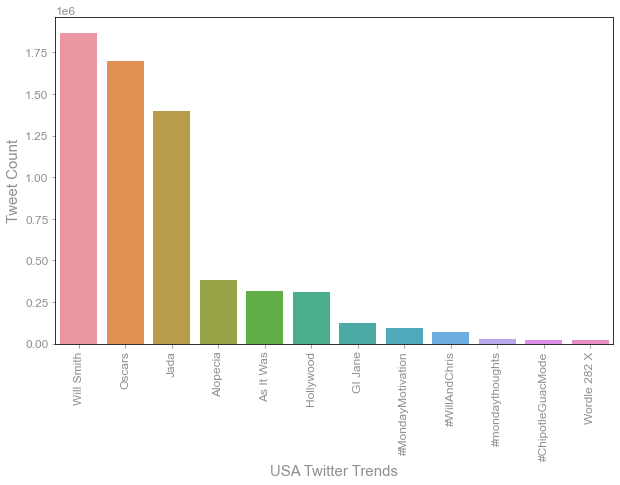

In [ ]:
#################### BARPLOT FOR USA TRENDS

import seaborn as sns
import matplotlib.pyplot as plt

############ DROP ANY COLUMNS THAT DON"T HAVE ANY TWEET VOLUME OR TWEETS NUMBERS
df = df.dropna()

plt.figure(figsize=(10,6))

##### SORT THE DATAFRAME TO SHOW TOP TRENDS FROM TOP TO BOTTOM
sorted_df = df.sort_values(['tweet_volume'], ascending=False).reset_index(drop=True)


###### PLOT THE BARPLOT OF TRENDING TOPICS
sns.barplot(data=sorted_df,
             x="name", 
             y="tweet_volume",
             order=sorted_df.name)
plt.xlabel("USA Twitter Trends", size= 15)             
plt.ylabel("Tweet Count", size= 15)             
plt.xticks(rotation=90)
plt.show()







In [ ]:

top_trend_on_twitter_query = sorted_df.iat[0,0]
trend_tweets = twitter_util.search_tweet(top_trend_on_twitter_query,count=100)


# SHOW THE QUERY OF TOP TREND USED TO FETCH TWEETS

print(top_trend_on_twitter_query)
twitter_util.save_tweets()


sdfasdfsadsf Will Smith


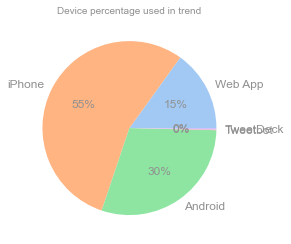

In [ ]:
################# PIECHART FOR DEVICES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
import itertools

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12


from pathlib import Path
import re
tweets_trending_file_path = Path() / "saved_tweets.csv"
trending_tweets = pd.read_csv(tweets_trending_file_path)


import re
client_system = trending_tweets["client_platform"].tolist()


# REGULAR EXPRESSION IS USED ON EVERY DATA POINT IN DF TO GET THE CLIENT PLATFORM OUT OF THE 
# HTML ANCHOR TAG USED BY TWITTER FOR SHOWING CLIENT DEVICE

twitter_client_system = []
for i in client_system:
    match = re.search(r'Android|iPhone|Web App|Tweetdeck|TweetDeck|Tweetbot',i)
    if match is not None:
      device = match.group()
      twitter_client_system.append(device)

counts = dict()
for i in twitter_client_system:
  counts[i] = counts.get(i, 0) + 1


labels = list(counts.keys())
data = list(counts.values())
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Device percentage used in trend", size= 10)                       
plt.show()


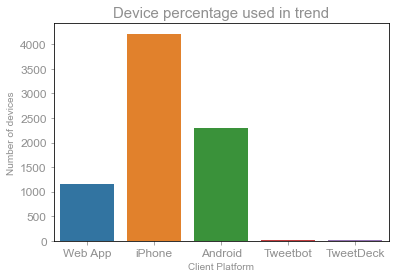

In [ ]:
################ DEVICES BARPLOT

sns.barplot(x=labels,y=data)
plt.xlabel("Client Platform", size=10)
plt.ylabel("Number of devices", size=10)
plt.title("Device percentage used in trend", size= 15)                       
plt.show()

In [ ]:
################# PIECHART FOR DEVICES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
import itertools

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12


from pathlib import Path
import re
tweets_trending_file_path = Path() / "saved_tweets.csv"
trending_tweets = pd.read_csv(tweets_trending_file_path)


import re
verified_user_tweets = trending_tweets["verified"].tolist()

counts = dict()
for i in verified_user_tweets:
  counts[i] = counts.get(i, 0) + 1


labels = list(counts.keys())
data = list(counts.values())
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Device percentage used in trend", size= 10)   
plt.legend(labels)                    
plt.show()


C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128557 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\matplotlib\bac

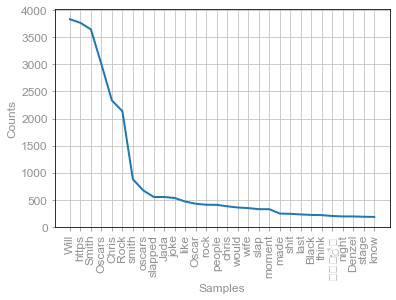

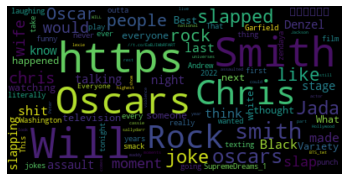

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

path_to_file = Path() / "saved_tweets.csv"

twitter_data = pd.read_csv(path_to_file)
tweets = twitter_data[["text"]]


tweets = twitter_data["text"].to_list()

document = ""
for tweet in tweets:
    document += tweet


document



tweet_tokens = nltk.word_tokenize(document)

stopwords = set(stopwords.words("english"))

tweet_tokens


filtered_tweet_text = [w for w in tweet_tokens if w not in stopwords]

wordcloud = WordCloud()

tweet_freq_dist = nltk.FreqDist(filtered_tweet_text)

sorted(tweet_freq_dist,key=tweet_freq_dist.__getitem__,reverse=True)

large_words = dict([(k,v) for (k,v) in tweet_freq_dist.items() if len(k) > 3])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30,cumulative=False)

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate_from_frequencies(frequency_dist)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()








In [ ]:
results = twitter.search(q=top_trend_on_twitter_query, count=100)

r = results["statuses"]

tweet_locations = [tweet for tweet in r if tweet["place"] is not None]

with open("sample.json", "w") as file:
    json.dump(r,file)

top_trend_on_twitter_query


'Will Smith'

In [ ]:
############### STREAMING API

############### ALTHOUGH STREAMING WAS USED FOR TESTING LOCATION TWEETS 
#### BUT THE TWEETS FROM STREAMS AREN"T USED THIS IS HERE JUST FOR REFERENCE PURPOSES 

from twython import TwythonStreamer
import csv
import json
import time



# counter = 0

def process_tweet(data):
        
        tweet = {}
        tweet["text"] = data["text"]
        tweet["created_at"] = data["created_at"]
        tweet["favorite_count"] = data["favorite_count"]
        if "place" in data and data["place"] != None:
            tweet["long"] = data["place"]["bounding_box"]["coordinates"][0][0][0]
            tweet["lat"] = data["place"]["bounding_box"]["coordinates"][0][0][1]
            print(tweet["long"], tweet["lat"], tweet["favorite_count"])
        else:
            tweet["long"] = None
            tweet["lat"] = None
        print(tweet)
        return tweet


def csv_set_header(data):
        with open("live_saved_tweets.csv", "a", encoding="utf-8",newline="") as file:
            header = data
            csv_writer = csv.writer(file)
            print("hello")
            csv_writer.writerow(header)

counter = 0

class MyStreamer(TwythonStreamer):
    end_time = time.time() + 10
    
    def on_success(self, data):
        global counter 
        if data["lang"] == "en":
            tweet_data = process_tweet(data)
            print(counter)
            
            
            if tweet_data["long"] is not None and tweet_data["lat"] is not None:
                self.save_to_csv(tweet_data)
                counter += counter
                print(counter)
            if counter >= 3:
                self.disconnect()


    def save_to_csv(self, tweet):
        with open(r'live_saved_tweets.csv', "a", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))





stream = MyStreamer(credentials["API_KEY"], credentials["API_SECRET"], credentials["ACCESS_TOKEN"], credentials["ACCESS_TOKEN_SECRET"])
csv_set_header(["text","created_at","favorite_count","long","lat"])



hello


In [ ]:
##############   GETTING TWITTER COORDINATES

trending_tweets = pd.read_csv("saved_tweets.csv")
trending_tweets = trending_tweets.dropna()

import gmplot 
import webbrowser
import folium
from folium.plugins import MarkerCluster


########### UNCOMMENT BELOW CODE TO PLOT MAP USING GMPLOT
# usa_map =  gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 18 )
# usa_map.draw("/users/usama/desktop/usa.html")
# webbrowser.open_new_tab("/users/usama/desktop/usa.html")

map = folium.Map(location=[48, -102], zoom_start=4)


marker_cluster = MarkerCluster().add_to(map)
locationlist = trending_tweets[["lat", "long"]].values.tolist()
locationlist = locationlist[1:-1]
print(locationlist)
for point in range(0,len(locationlist)):
    folium.Marker(locationlist[point], popup=trending_tweets["location"].values.tolist()[point],
                icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')
                ).add_to(marker_cluster)


print(top_trend_on_twitter_query)
map

####### FAKE TWEETS
# BOUNDING BOX SHOWS EXACT LOCATION, WHILE NAME SHOWS WHAATA USER HAVE PUT IN PROFILE



[[40.785365, -73.933612], [32.582128, -117.117116], [40.785365, -73.933612], [38.868002, -94.733122], [36.074534, -115.0646094], [38.868002, -94.733122], [36.074534, -115.0646094], [40.858471, -74.06836]]
Will Smith


In [ ]:
################## STREAMER TREND 
# top_trend_on_twitter_query

In [ ]:
############################# For popular tweets location

# params = {}
# popular_tweets = Twitter_Utility()
# popular_tweets.search_tweet({params["q"]:top_trend_on_twitter_query,
#                                 params["count"]:100, 
#                                 params["result_type"]:"popular",
#                                 params["has:geo"]:True})
# popular_tweets.save_tweets()

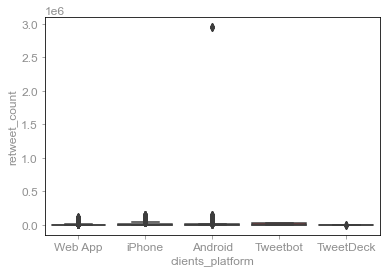

In [ ]:

############### BOX PLOT FOR DEVICES & TWEETS
import seaborn as sns_1
df_tweets = pd.read_csv("saved_tweets.csv")
pattern = r'Android|iPhone|Web App|Tweetdeck|TweetDeck|Tweetbot'

filter=  df_tweets['client_platform'].str.contains(pattern)
df_tweets = df_tweets[filter]

df_tweets["clients_platform"] = twitter_client_system

ax2 = sns_1.boxplot(x="clients_platform", y="retweet_count" ,data=df_tweets)


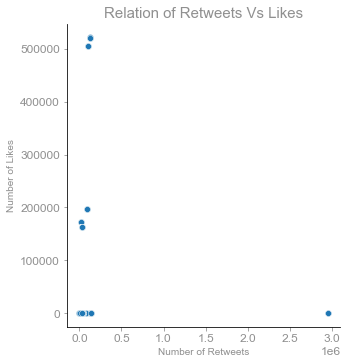

In [ ]:
################ RELAION BETWEETN RETWEEET VS LIKES

sns.relplot(x="retweet_count", y="favorite_count",
             data=df_tweets)
plt.xlabel("Number of Retweets", size=10)
plt.ylabel("Number of Likes", size=10)
plt.title("Relation of Retweets Vs Likes", size= 15)                       
plt.show()

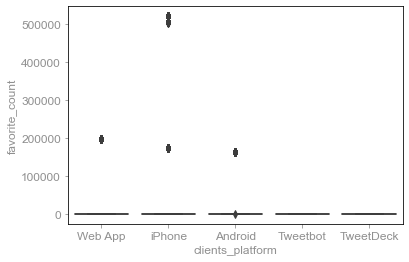

In [ ]:
ax = sns.boxplot(x="clients_platform", y="favorite_count" ,data=df_tweets)


C:\Users\usama\Desktop\BCU\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


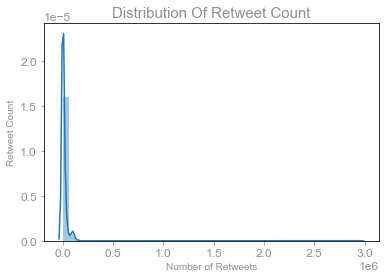

In [ ]:
sns.distplot(df_tweets["retweet_count"],kde=True)

plt.xlabel("Number of Retweets", size=10)
plt.ylabel("Retweet Count", size=10)
plt.title("Distribution Of Retweet Count", size= 15)                       
plt.show()

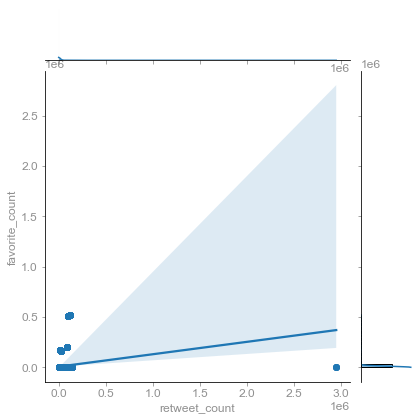

In [ ]:
sns.jointplot(x="retweet_count",y="favorite_count" ,data=df_tweets, kind="reg")

In [ ]:
# sns.pairplot(df_tweets)

<AxesSubplot:xlabel='favorite_count'>

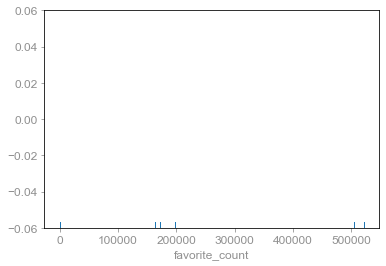

In [ ]:
sns.rugplot(df_tweets["favorite_count"])

<AxesSubplot:xlabel='followers_count'>

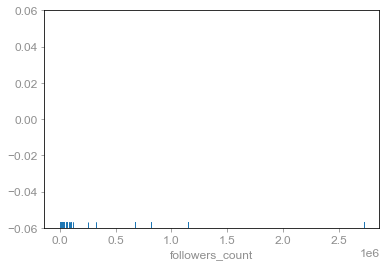

In [ ]:
sns.rugplot(df_tweets["followers_count"])

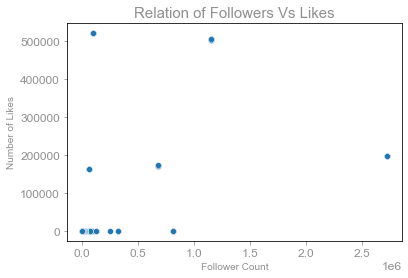

In [ ]:
sns.scatterplot(x="followers_count", y="favorite_count", data=df_tweets)

plt.xlabel("Follower Count", size=10)
plt.ylabel("Number of Likes", size=10)
plt.title("Relation of Followers Vs Likes", size= 15)                       
plt.show()